# Import Libraries

In [ ]:
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import networkx as nx
from pyvis.network import Network
from networkx_query import search_nodes, search_edges, search_direct_relationships


# Read JSON

In [ ]:
with open("sample_dataset\cyvestigo_graph.json") as f:
    json_data = json.load(f)
json_data

In [20]:
#Nodes in graphdata
graphdata_LinkChart = [i for i in json_data[0]['data']['items'] if 'id' in list(i.keys())[0] ]
print(len(graphdata_LinkChart))
graphdata_LinkChart

144


[{'id': '1', 'type': 'node', 't': 'splunkd.exe', 'd': {'labels': ['Process']}},
 {'id': '2',
  'type': 'node',
  't': 'splunk-winprintmon.exe',
  'd': {'labels': ['Process']}},
 {'id': '5',
  'type': 'node',
  't': 'splunk-admon.exe',
  'd': {'labels': ['Process']}},
 {'id': '14',
  'type': 'node',
  't': 'splunk-MonitorNoHandle.exe',
  'd': {'labels': ['Process']}},
 {'id': '19',
  'type': 'node',
  't': 'svchost.exe  ',
  'd': {'labels': ['Process'], 'score_ttp': '1', 'mitre-attack': ['T1043']}},
 {'id': '20',
  'type': 'node',
  't': '443',
  'd': {'labels': ['Port'], 'score_ttp': '1', 'mitre-attack': ['T1043']}},
 {'id': '21',
  'type': 'node',
  't': '10.0.5.112',
  'd': {'labels': ['IP_Address'],
   'score_ttp': '1',
   'mitre-attack': ['T1065']}},
 {'id': '22',
  'type': 'node',
  't': '10.0.1.10',
  'd': {'labels': ['IP_Address'],
   'score_ttp': '1',
   'mitre-attack': ['T1043']}},
 {'id': '27',
  'type': 'node',
  't': '53',
  'd': {'labels': ['Port'], 'score_ttp': '1', 'mitr

In [5]:
#Edges of nodes
graphdata_dt = [i for i in json_data[0]['data']['items'] if 'dt' in list(i.keys())[0] ]
print(len(graphdata_dt))
graphdata_dt


213


[{'dt': [1588935003000,
   1588936036000,
   1588936151000,
   1588935303000,
   1588936089000,
   1588935735000,
   1588935608000,
   1588935849000,
   1588935787000,
   1588935065000,
   1588935428000,
   1588935251000,
   1588935127000,
   1588935365000,
   1588935975000,
   1588935912000,
   1588935189000,
   1588935492000,
   1588935555000,
   1588935671000],
  'a2': True,
  'id1': '1',
  'id2': '2',
  'id': '3',
  'type': 'link',
  't': 'Create Process',
  'd': {'labels': '',
   'ids': ['3',
    '9',
    '1068',
    '1071',
    '1074',
    '1077',
    '1080',
    '1083',
    '1086',
    '1089',
    '1092',
    '1095',
    '1098',
    '1101',
    '1104',
    '1107',
    '1110',
    '1113',
    '1116',
    '1119']}},
 {'dt': [1588935055000,
   1588935901000,
   1588935003000,
   1588935418000,
   1588935303000,
   1588935777000,
   1588935116000,
   1588936016000,
   1588935355000,
   1588935492000,
   1588935241000,
   1588935179000,
   1588935545000,
   1588935597000,
   15889361

In [13]:
#description of each nodes in graphdata
graphdata_nodeDesc = [i['d'] for i in graphdata_LinkChart ]
print(len(graphdata_nodeDesc))
graphdata_nodeDesc

KeyError: 'd'

In [14]:
#Properties
propertieswithid = []
graphdata_LinkChart = [i['Properties'] for i in json_data[1:]]
for i in zip(graphdata_LinkChart, json_data[1:]):
    grappunzip = i[0]
    json_datazip = i[1]['Id']
    grappunzip['id'] = json_datazip
    propertieswithid.append(grappunzip)

print(len(graphdata_LinkChart))   
print(len(propertieswithid))
propertieswithid


1815
1815


[{'ComputerName': 'DESKTOP-GNSLAB2.STELLA.LOCAL\t',
  'Account_Name': 'DESKTOP-GNSLAB2$',
  'Creator_Process_Name': ' C:\\Program Files\\SplunkUniversalForwarder\\bin\\splunkd.exe  ',
  'Creator_Process_ID': ' 0x728  ',
  'EventCode': '4688',
  'New_Process_ID': '  0x1128  ',
  'New_Process_Name': ' C:\\Program Files\\SplunkUniversalForwarder\\bin\\splunk-regmon.exe  ',
  'OriginatingComputerName': '10.0.5.112\t',
  'RecordNumber': '968796\t',
  '_time': '2020-05-08 11:01:11',
  'Process_Command_Line': ' "C:\\Program Files\\SplunkUniversalForwarder\\bin\\splunk-regmon.exe"  ',
  'custodio_time': 1588935671000,
  'path': ' C:\\Program Files\\SplunkUniversalForwarder\\bin\\splunkd.exe  ',
  'Title': ['splunkd.exe'],
  'id': '1'},
 {'ComputerName': 'DESKTOP-GNSLAB2.STELLA.LOCAL\t',
  'Account_Name': 'DESKTOP-GNSLAB2$',
  'Creator_Process_Name': ' C:\\Program Files\\SplunkUniversalForwarder\\bin\\splunkd.exe  ',
  'Creator_Process_ID': ' 0x728  ',
  'EventCode': '4688',
  'New_Process_ID':

In [12]:
# properties in pandas table
df_prop = pd.DataFrame(propertieswithid)
df_prop

,Account_Domain,Account_Name,Application_Name,ComputerName,Creator_Process_ID,Creator_Process_Name,Destination_Address,Destination_Port,Direction,EventCode,...,Source_Address,Source_Port,Title,_time,custodio_time,id,mitre-attack,path,score_ioc,score_ttp
0,NaN,DESKTOP-GNSLAB2$,NaN,DESKTOP-GNSLAB2.STELLA.LOCAL\t,0x728,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN,NaN,4688,...,NaN,NaN,[splunkd.exe],2020-05-08 11:01:11,1588935671000,1,NaN,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN
1,NaN,DESKTOP-GNSLAB2$,NaN,DESKTOP-GNSLAB2.STELLA.LOCAL\t,0x728,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN,NaN,4688,...,NaN,NaN,[splunk-winprintmon.exe],2020-05-08 11:01:11,1588935671000,2,NaN,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN
2,NaN,DESKTOP-GNSLAB2$,NaN,DESKTOP-GNSLAB2.STELLA.LOCAL\t,0x728,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN,NaN,4688,...,NaN,NaN,Create Process,2020-05-08 10:50:55,1588935003000,3,NaN,NaN,NaN,NaN
3,NaN,DESKTOP-GNSLAB2$,NaN,DESKTOP-GNSLAB2.STELLA.LOCAL\t,0x728,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN,NaN,4688,...,NaN,NaN,[splunk-admon.exe],2020-05-08 11:02:04,1588935724000,5,NaN,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN
4,NaN,DESKTOP-GNSLAB2$,NaN,DESKTOP-GNSLAB2.STELLA.LOCAL\t,0x728,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN,NaN,4688,...,NaN,NaN,Create Process,2020-05-08 10:50:03,1588935055000,6,NaN,NaN,NaN,NaN
5,NaN,DESKTOP-GNSLAB2$,NaN,DESKTOP-GNSLAB2.STELLA.LOCAL\t,0x728,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN,NaN,4688,...,NaN,NaN,Create Process,2020-05-08 10:50:03,1588936036000,9,NaN,NaN,NaN,NaN
6,NaN,DESKTOP-GNSLAB2$,NaN,DESKTOP-GNSLAB2.STELLA.LOCAL\t,0x728,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN,NaN,4688,...,NaN,NaN,Create Process,2020-05-08 10:50:55,1588935901000,12,NaN,NaN,NaN,NaN
7,NaN,DESKTOP-GNSLAB2$,NaN,DESKTOP-GNSLAB2.STELLA.LOCAL\t,0x728,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN,NaN,4688,...,NaN,NaN,[splunk-MonitorNoHandle.exe],2020-05-08 11:01:54,1588935714000,14,NaN,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN
8,NaN,DESKTOP-GNSLAB2$,NaN,DESKTOP-GNSLAB2.STELLA.LOCAL\t,0x728,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN,NaN,4688,...,NaN,NaN,Create Process,2020-05-08 10:50:55,1588935901000,15,NaN,NaN,NaN,NaN
9,NaN,DESKTOP-GNSLAB2$,NaN,DESKTOP-GNSLAB2.STELLA.LOCAL\t,0x728,C:\Program Files\SplunkUniversalForwarder\bin...,NaN,NaN,NaN,4688,...,NaN,NaN,Create Process,2020-05-08 11:05:01,1588935055000,18,NaN,NaN,NaN,NaN


In [15]:
eventname = [ i['Title']  for i in propertieswithid]
eventname
eventtime = [ i['_time']  for i in propertieswithid]
eventtime

['2020-05-08 11:01:11',
 '2020-05-08 11:01:11',
 '2020-05-08 10:50:55',
 '2020-05-08 11:02:04',
 '2020-05-08 10:50:03',
 '2020-05-08 10:50:03',
 '2020-05-08 10:50:55',
 '2020-05-08 11:01:54',
 '2020-05-08 10:50:55',
 '2020-05-08 11:05:01',
 '2020-05-08 11:09:42',
 '2020-05-08 11:00:53',
 '2020-05-08 10:58:54',
 '2020-05-08 10:59:37',
 '2020-05-08 10:59:36',
 '2020-05-08 10:59:36',
 '2020-05-08 10:59:36',
 '2020-05-08 11:00:53',
 '2020-05-08 10:58:54',
 '2020-05-08 10:59:05',
 '2020-05-08 10:59:05',
 '2020-05-08 10:59:05',
 '2020-05-08 10:59:15',
 '2020-05-08 10:59:15',
 '2020-05-08 10:59:15',
 '2020-05-08 10:59:47',
 '2020-05-08 10:59:47',
 '2020-05-08 10:59:47',
 '2020-05-08 10:57:39',
 '2020-05-08 10:59:05',
 '2020-05-08 10:59:05',
 '2020-05-08 10:59:36',
 '2020-05-08 10:59:05',
 '2020-05-08 10:59:36',
 '2020-05-08 11:00:18',
 '2020-05-08 10:59:15',
 '2020-05-08 10:59:15',
 '2020-05-08 10:59:15',
 '2020-05-08 11:00:29',
 '2020-05-08 10:59:26',
 '2020-05-08 10:59:16',
 '2020-05-08 10:

In [16]:
#get all graphdata entitites
graphdata = [i for i in json_data[0]['data']['items']]
graphdatalen = len(graphdata)
print(graphdatalen)

# Check if linkeddata and dt is unique attrib in graphdata
linkedchartlen = len(graphdata_LinkChart)
graphdata_dtlen = len(graphdata_dt)

validator = linkedchartlen + graphdata_dtlen
validator

357


2028

# Event Plot

In [1]:
dates = eventtime[:10]
names = eventname[:10]


# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in dates]

NameError: name 'eventtime' is not defined

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

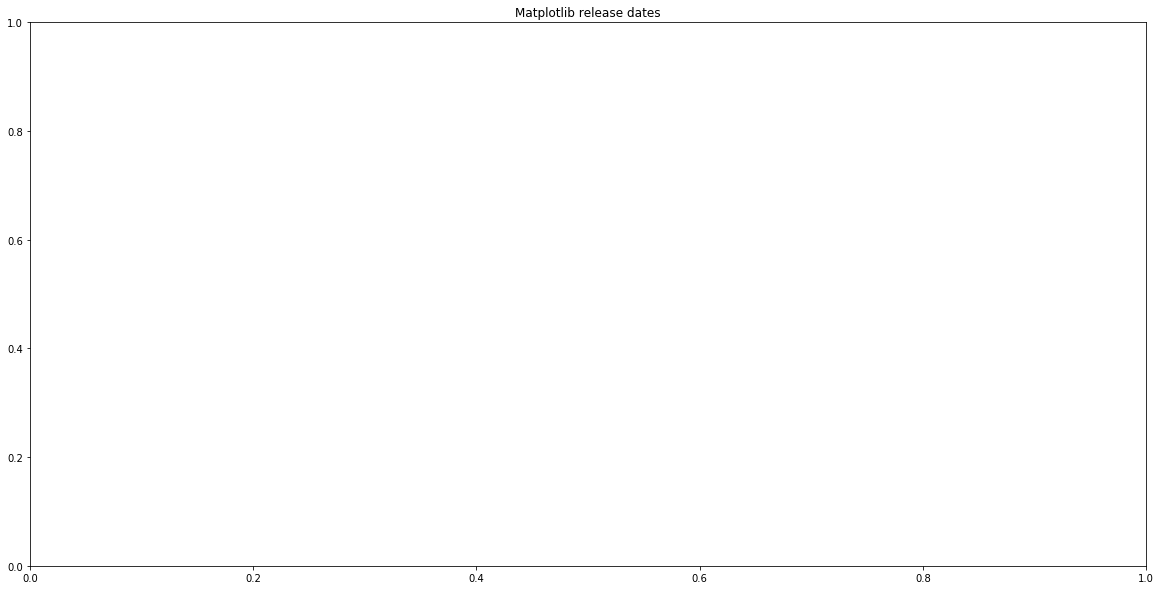

In [18]:
# Choose some nice levels
levels = np.tile([-10, 10,-9,9,-8,8,-7,7,-6,6,-5, 5, -4, 4, -3, 3, -2,2, -1, 1],
                 int(np.ceil(len(dates)/10)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 10))
ax.set(title="Matplotlib release dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MinuteLocator(interval=2))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

# Network Analysis

In [21]:
G = nx.Graph()

for nodes in graphdata_LinkChart:
    G.add_node(nodes['id'], title=nodes['t'])
    
for edges in graphdata_dt:
    G.add_edge(edges['id1'],edges['id2'], title=edges['t'])


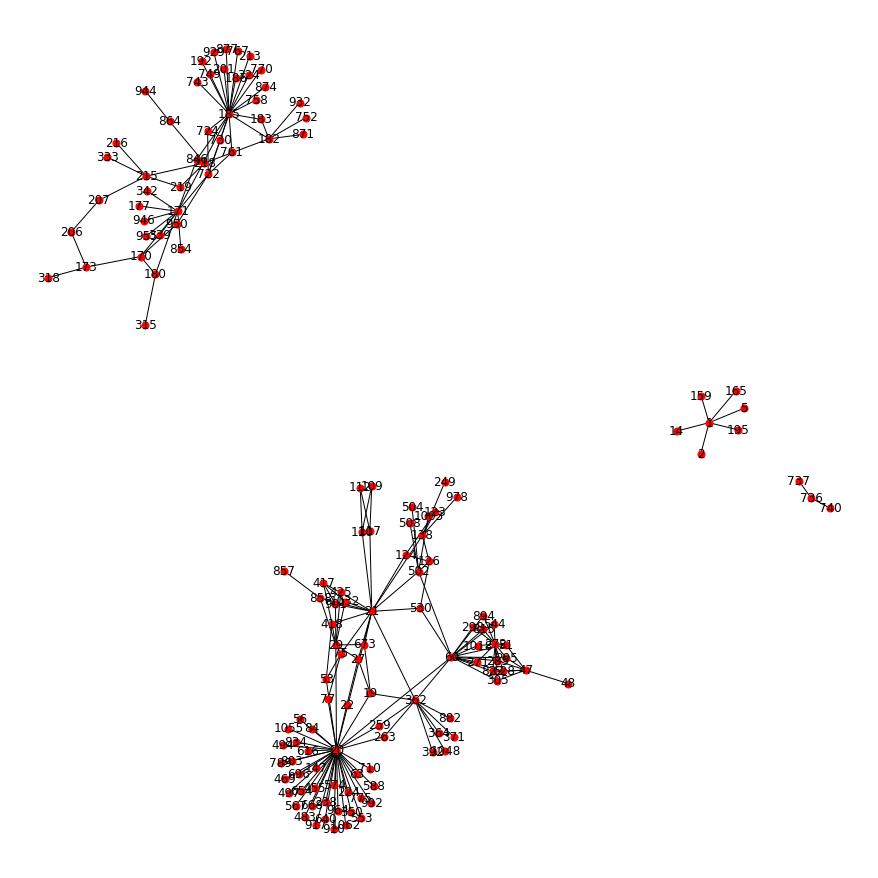

In [22]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos, node_size = 50)
plt.show()

In [18]:
def get_max_degree_node(list_of_nodes_to_eliminate, G):
	max_degree=0
	all_remaining_nodes = [x for x in G.nodes() if x not in list_of_nodes_to_eliminate]
	max_node=all_remaining_nodes[0]
	for node in all_remaining_nodes:
    		degree = G.degree(node)
    		if degree>max_degree:
        			max_degree = degree
        			max_node = node
	return max_degree, max_node

max_skill_degree, max_skill_node = get_max_degree_node([], G)
print(max_skill_node)
print(max_skill_degree)
print(G.nodes[max_skill_node])


20
41
{'title': '443'}


In [19]:
nx.node_connected_component(G,'20')

{'1003',
 '1018',
 '1032',
 '1048',
 '1055',
 '1062',
 '109',
 '110',
 '112',
 '117',
 '123',
 '124',
 '126',
 '138',
 '147',
 '19',
 '20',
 '21',
 '22',
 '224',
 '238',
 '249',
 '259',
 '263',
 '27',
 '271',
 '272',
 '285',
 '29',
 '295',
 '298',
 '305',
 '350',
 '362',
 '364',
 '371',
 '392',
 '417',
 '418',
 '425',
 '455',
 '469',
 '47',
 '48',
 '483',
 '494',
 '497',
 '502',
 '504',
 '508',
 '51',
 '53',
 '530',
 '544',
 '553',
 '56',
 '567',
 '574',
 '588',
 '60',
 '616',
 '628',
 '63',
 '640',
 '654',
 '668',
 '673',
 '696',
 '710',
 '75',
 '77',
 '775',
 '789',
 '803',
 '815',
 '822',
 '834',
 '84',
 '857',
 '858',
 '882',
 '894',
 '901',
 '910',
 '917',
 '964',
 '978',
 '992'}

In [30]:
list(search_direct_relationships(graph=G, source={"eq": ["title", "123"]}))

[]

In [20]:
## use pyviz to visualise
nt = Network()
nt.show_buttons()
nt.from_nx(G)
nt.show("nx.html")

## Generating graph network straight from extracted logs

In [2]:
with open('data.json') as f:
    jsonread = json.load(f)
    jsonread = jsonread["data"]

In [3]:
src_ip = []
dest_ip = []
for data in jsonread:
    src_ip.append(data["Source_Address"])
    dest_ip.append(data["Destination_Address"])

# Get src to dest communication
src_ip = list(set(src_ip))#get unique src ip
edgeset = []
for i in zip(src_ip, dest_ip):
    edgeset.append(i)

# create the graph from edge list
G = nx.DiGraph()
G.add_edges_from(edgeset)

In [4]:
# view the result in pyviz
nt = Network()
nt.show_buttons()
nt.from_nx(G)
nt.show("nx.html")